# Logistic Regression MNIST Dataset

Construction of a very simple neural network to do hindwritting classification. This is a project done for the Coursera course <i>"Introduction to Machine Learning"</i>. Most of the code was built from the guide of a Jupyter Notebook: 
 <b> <i>https://www.coursera.org/learn/machine-learning-duke/ungradedLab/IP4b8/logistic-regression/lab?path=%2Fnotebooks%2F2A_Logistic_Regression.ipynb. </b> </i>

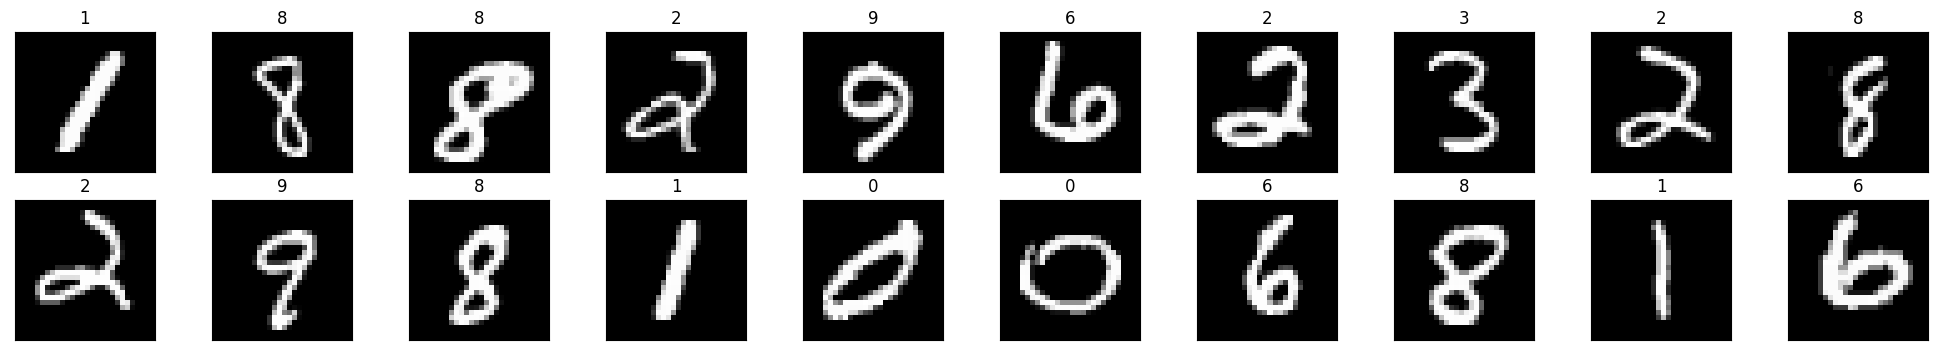

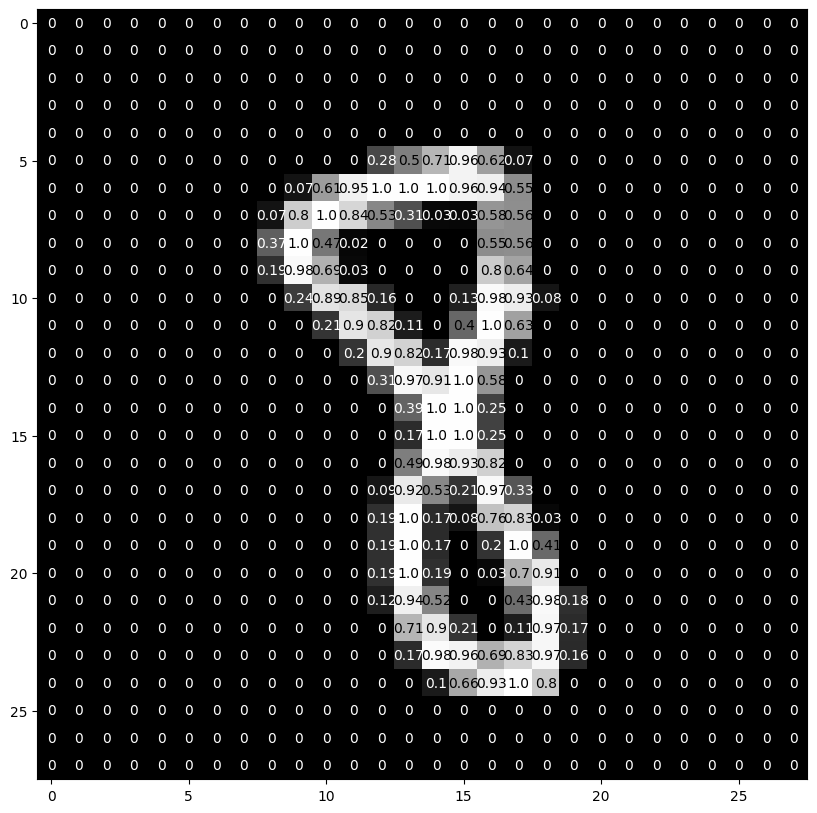

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from tqdm.notebook import tqdm

class MNIST_Logistic_Regression(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784,10) # Define the parameters 
        
    def forward(self,x):
        return self.lin(x)
        
## LOADING THE DATA

train_set = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
test_set = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)


# We ideally want our dataset code to be decoupled from our model training code for better readability and modularity 
# We are going to use a DataLoader that wraps an iterable around the DataSet to enable easy access to the samples

train_loader = torch.utils.data.DataLoader(train_set, batch_size=20, shuffle=True)
test_loader =torch.utils.data.DataLoader(test_set, batch_size=20, shuffle=False)

#MODEL
model = MNIST_Logistic_Regression()

## TAKING A LOOK AT THE DATA
# Obtaining one batch of training images

dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()

fig = plt.figure(figsize=(25,4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(str(labels[idx].item()))

#View an Image in More Detail
img = np.squeeze(images[1])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.imshow(img,cmap='gray')
width, height = img.shape
lim = img.max()/2.5
for x in range(width):
    for y in range(height):
        pixel_value = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(pixel_value), xy=(y,x), horizontalalignment='center', verticalalignment='center', color='white' if img[x][y]<lim else 'black')


In [8]:
## TRAINING

# Initialize parameters, the weight (W) and bias (b) make up the parameters of the model.
# We are trying to find good values for every element in (W) and (b). That's the reason we set requires_grad to True.
#W = torch.randn(784, 10)/np.sqrt(784)
#W.requires_grad_()
#b = torch.zeros(10, requires_grad=True)
#With these model parameters, we compute y: y = torch.matmul(x,W) + b
 
# Optimizer -> Stochastic gradient descent  Loss -> Cross entropy loss
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

# Iteration
for images, labels in tqdm(train_loader):
    optimizer.zero_grad()
    
    #Forward pass
    x = images.view(-1,28*28)
    y = model(x)
    cross_entropy = loss(y,labels)
    
    #Backward pass: Change the paramaters in a way that minimize loss
    cross_entropy.backward()
    optimizer.step()


  0%|          | 0/3000 [00:00<?, ?it/s]

In [9]:
## Testing
correct = 0
total = len(test_set)

#We are not interested in computing gradients during evaluation.
with torch.no_grad():

    #Iteration through test set
    for images, labels in tqdm(test_loader):
        
        #Forward pass
        x = images.view(-1, 28*28)
        y = model(x)
        
        predictions = torch.argmax(y, dim=1)
        correct += torch.sum((predictions==labels).float())
   
    print('Test accuracy:{}'.format(correct/total))


  0%|          | 0/500 [00:00<?, ?it/s]

Test accuracy:0.9136000275611877


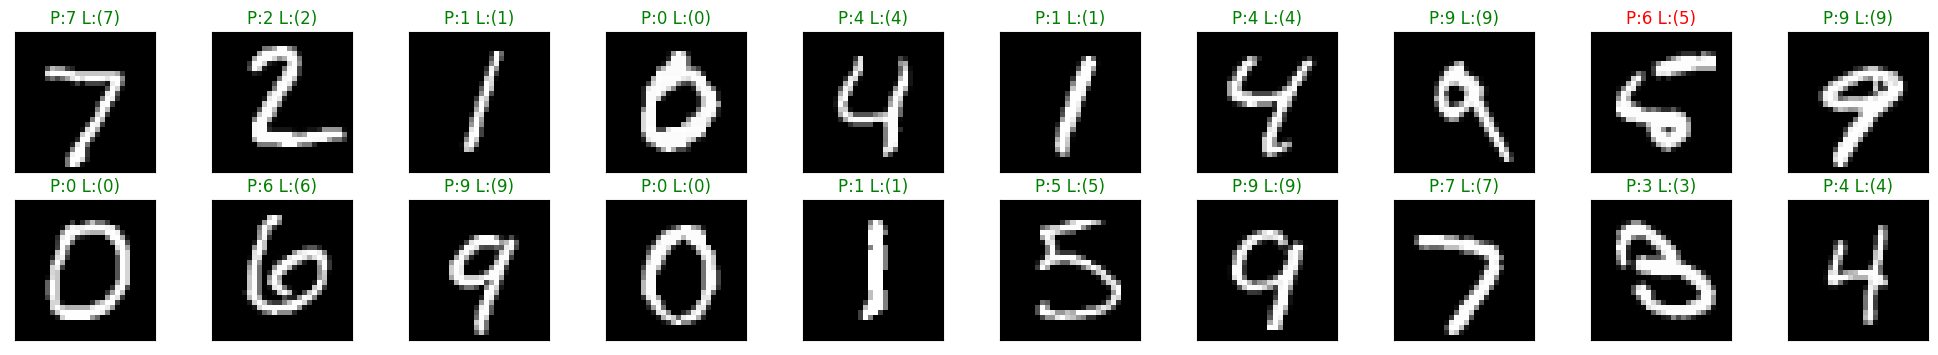

In [10]:
## Visualize Sample Test Results
testiter = iter(test_loader)
images, labels = next(testiter)
x = images.view(-1, 28*28)

# get sample outputs
output = model(x)

# converting output probabilities to predicted class
out_prob, prediction = torch.max(output, 1)
images = images.numpy()

# show images in the batch
fig = plt.figure(figsize=(25,4))
for idx in np.arange(20):
    ax = fig.add_subplot(2,10,idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    
    # P for prediction, L for label (true label)
    ax.set_title('P:{} L:({})'.format(str(prediction[idx].item()), str(labels[idx].item())), color= ("green" if prediction[idx]==labels[idx] else "red" ))

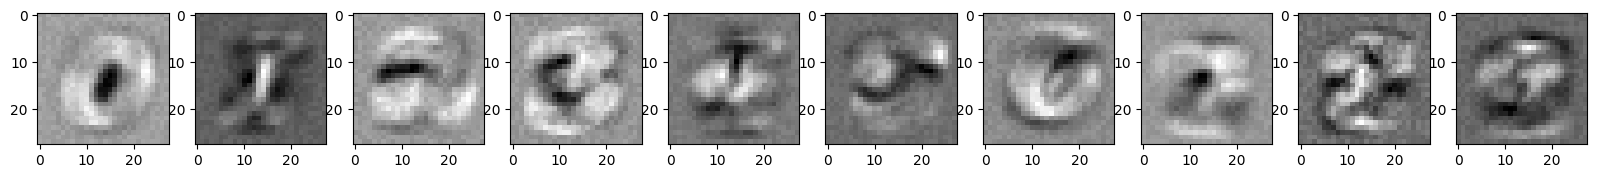

In [19]:
## Filters: Ploting the weights

fig, ax = plt.subplots(1,10, figsize=(20,2))

for digit in range(10):
    ax[digit].imshow(torch.transpose(model.lin.weight,0,1)[:,digit].detach().view(28,28), cmap='gray')
    

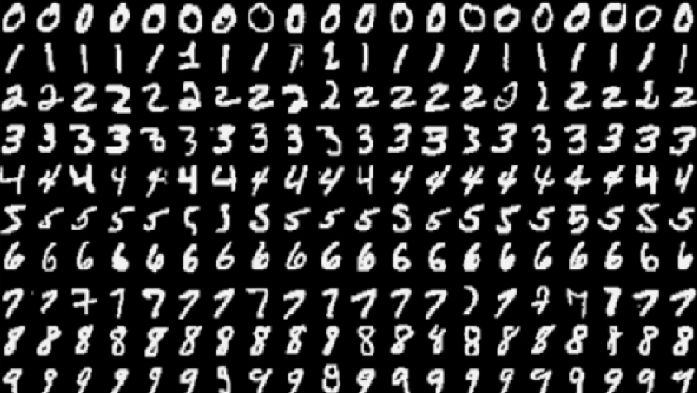



<i> Source: http://yann.lecun.com/exdb/mnist/ (MNIST handwritten digit database, Yann LeCun, Corinna Cortes and Chris Burges, s. f.)</i>

In [ ]:
# Ignore

linear = nn.Linear(2,3)
print('weights:{} '.format(torch.transpose(linear.weight,0,1)))
print('bias:{}'.format(linear.bias))
inn = torch.randn(3,2)
out = linear(inn)
print('input:{}'.format(inn))
print('output:{}'.format(out))

In [ ]:
#Ignore

## Accessing Data and Targets in a PyTorch DataLoader

#First batch
for idx, batch in enumerate(train_loader):
    print('Batch index: ', idx)
    print('Batch size: ', batch[0].size())
    print('Batch label: ', batch[1])
    break
    
 #for batch_idx, batch in enumerate(train_loader):
      #print(batch_idx, batch[1])
      #break
        
#First image of the first batch
#for idx,(data,target) in enumerate(train_loader):
        #print(data[0])
        #print(target[0])
        #break
        